<a href="https://colab.research.google.com/github/vivek-bombatkar/MyLearningNotes/blob/master/the_crowd_counting_model_pre_processed_waights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/vivek-bombatkar/CSRNet-pytorch.git
!ls

Cloning into 'CSRNet-pytorch'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 98 (delta 4), reused 0 (delta 0), pack-reused 86
Unpacking objects: 100% (98/98), done.
CSRNet-pytorch	sample_data


In [0]:
!cp -r CSRNet-pytorch/* .

In [0]:
#importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [0]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [0]:
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
model = CSRNet()
model = model.cuda()


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
553433881it [00:06, 88517710.53it/s]


In [0]:
#loading the trained weights
checkpoint = torch.load('0model_best.pth.tar') #part_A/0model_best.pth.tar
model.load_state_dict(checkpoint['state_dict'])


Predicted Count :  534


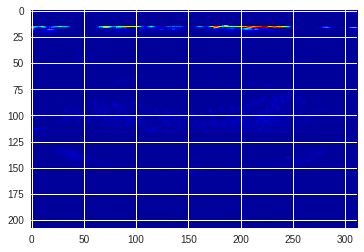

Original Image


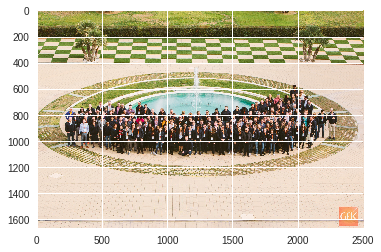

In [0]:
from matplotlib import cm as c
img = transform(Image.open('weCreate_gfk.jpg').convert('RGB')).cuda() #'part_A/test_data/images/IMG_100.jpg'

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
# temp = h5py.File('part_A/test_data/ground-truth/IMG_100.h5', 'r')
# temp_1 = np.asarray(temp['density'])
# plt.imshow(temp_1,cmap = c.jet)
# print("Original Count : ",int(np.sum(temp_1)) + 1)
# plt.show()
print("Original Image")
plt.imshow(plt.imread('weCreate_gfk.jpg')) #'part_A/test_data/images/IMG_100.jpg'
plt.show()